In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
from random import randint

from ipywidgets import widgets
from IPython.display import display

In [3]:
from flange.actions import *
from flange.combiners import *
from flange.conditions import *
from flange.graphs import *
from flange.locations import *
from flange.roots import *
from flange.runtime import *

%aimport flange.actions
%aimport flange.combiners
%aimport flange.conditions
%aimport flange.graphs
%aimport flange.locations
%aimport flange.roots
%aimport flange.runtime

In [17]:
def show(flanglet, graph, size=(8,10)):
    before = graph().copy()
    subset = flanglet.focus(before.copy())
    after = flanglet(before.copy())
    
    pos = nx.spring_layout(before)
    (fig, (ax_before, ax_select, ax_after)) = plt.subplots(1,3)

    fig.set_figheight(size[0])
    fig.set_figwidth(size[1])
    
    nx.draw(before, pos=pos, ax=ax_before)
    nx.draw_networkx_labels(before, pos=pos, ax=ax_before)

    if subset is not None:
        nx.draw(subset, pos=pos, ax=ax_select)
        nx.draw_networkx_labels(subset, pos=pos, ax=ax_select)

    nx.draw(after, pos=pos, ax=ax_after)
    nx.draw_networkx_labels(after, pos=pos, ax=ax_after)
    
    return fig

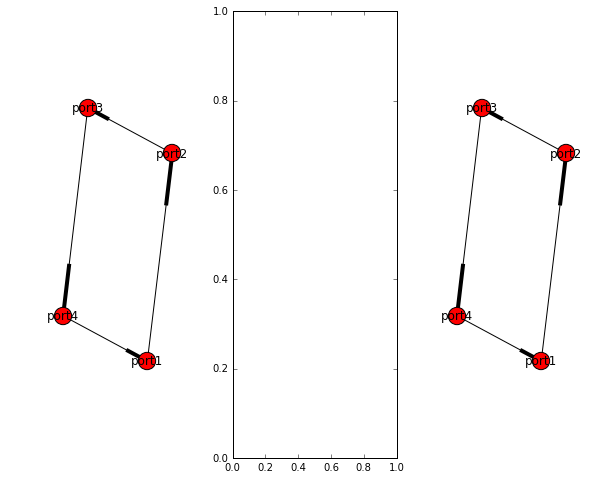

In [18]:
fig = show(rule(lambda x: x, lambda x:x), graph("ring"))